In [1]:
import pandas as pd
import numpy as np 
import nltk
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy 
from scipy import spatial
import re
from textblob import TextBlob
sw = nltk.corpus.stopwords.words('english')
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.util import ngrams
from textblob import TextBlob
from textblob import Word
from nltk.stem.snowball import SnowballStemmer
sttemmer = SnowballStemmer("english")
from nltk.stem import PorterStemmer
st = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("../TED_data.csv")

In [3]:
data

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,...,film_date.minute,film_date.second,published_date.year,published_date.month,published_date.day_of_month,published_date.day_of_week,published_date.hour,published_date.minute,published_date.second,transcript
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25 00:00:00,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,...,0,0,2006,6,27,1,0,11,0,Good morning. How are you?(Laughter)It's been ...
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25 00:00:00,43,Al Gore,Al Gore: Averting the climate crisis,1,...,0,0,2006,6,27,1,0,11,0,"Thank you so much, Chris. And it's truly a gre..."
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24 00:00:00,26,David Pogue,David Pogue: Simplicity sells,1,...,0,0,2006,6,27,1,0,11,0,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26 00:00:00,35,Majora Carter,Majora Carter: Greening the ghetto,1,...,0,0,2006,6,27,1,0,11,0,If you're here today — and I'm very happy that...
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22 00:00:00,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,...,0,0,2006,6,27,1,20,38,0,"About 10 years ago, I took on the task to teac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2548,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06 00:00:00,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,...,0,0,2017,9,19,1,20,0,16,"So, Ma was trying to explain something to me a..."
2546,2549,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24 00:00:00,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,...,0,0,2017,9,20,2,15,2,17,This is a picture of a sunset on Mars taken by...
2547,2550,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24 00:00:00,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,...,0,0,2017,9,21,3,15,1,35,"In my early days as a graduate student, I went..."
2548,2551,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08 00:00:00,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,...,0,0,2017,9,21,3,20,0,42,I took a cell phone and accidentally made myse...


# Converting the columns into string type

In [4]:
data = data[['title','transcript']].astype(str)
data.head()

,title,transcript
0,Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...
1,Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre..."
2,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,Greening the ghetto,If you're here today — and I'm very happy that...
4,The best stats you've ever seen,"About 10 years ago, I took on the task to teac..."


# Text preprocessing

In [5]:
import nltk
nltk.download("stopwords")
sw = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def  text_processing(df):
    """""=== Lower case ==="""
    df['transcript'] = df['transcript'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    '''=== Removal of stop words ==='''
    #stopsw = stopwords.words('english')
    df['transcript'] = df['transcript'].apply(lambda x: " ".join(x for x in x.split()if x not in sw))
    
    '''=== Spelling Correction === '''
    #df['transcript'].apply(lambda x: str(TextBlob(x).correct()))
    
    '''=== Removal of Punctuation ==='''
    df['transcript'] = df['transcript'].str.replace('[^\w\s]', '')  

    '''=== Removal of Numeric ==='''
    df['transcript'] = df['transcript'].str.replace('[0-9]', '')
    
    return df

In [7]:
data = text_processing(data)
print(data)

                                                  title  \
0                           Do schools kill creativity?   
1                           Averting the climate crisis   
2                                      Simplicity sells   
3                                   Greening the ghetto   
4                       The best stats you've ever seen   
...                                                 ...   
2545  What we're missing in the debate about immigra...   
2546                    The most Martian place on Earth   
2547  What intelligent machines can learn from a sch...   
2548       A black man goes undercover in the alt-right   
2549  How a video game might help us build better ci...   

                                             transcript  
0     good morning. you?(laughter)it's great, it? i'...  
1     thank much, chris. truly great honor opportuni...  
2     (music: "the sound silence," simon & garfunkel...  
3     today — i'm happy — heard sustainable developm...  
4

In [8]:
data['transcript'] = data['transcript'].apply(lambda a: " ".join([st.stem(x) for x in a.split()]))

# converting text to features using count vectorizer

In [9]:
cv =CountVectorizer()
cv.fit(data['transcript'])
# Transform the training data using count vectorizer object
cv_tedfeatures = cv.transform(data['transcript'])


In [10]:
#word level TF-IDF
tv = TfidfVectorizer()
tv.fit(data['transcript'])
tv_tedfeatures =  tv.transform(data['transcript'])


# Loading Pretrained Word2vec

In [11]:

# Load pre-trained word vectors
m1 = gensim.models.KeyedVectors.load_word2vec_format("../GoogleNews-vectors-negative300.bin", binary=True)

# Function to get the embeddings
def get_embedding(x, out=False):
    if x in m1:
        if out:
            return m1.get_vector(x)
        else:
            return m1[x]
    else:
        return np.zeros(300)


In [46]:
# Getting means 
op =  {}
for i in data['transcript']:
    avg_vct_doc = (np.mean(np.array([get_embedding(ax) for ax in nltk.word_tokenize((i))]), axis=1))
    dict = { i : (avg_vct_doc) }
    op.update(dict)    
    


In [47]:
results_key = list()
results_value = list()
for key, value in op.items():###########333op
    results_key.append(key)
    results_value.append(np.array(value))


# Implementing K-means to find optimal clusters

C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


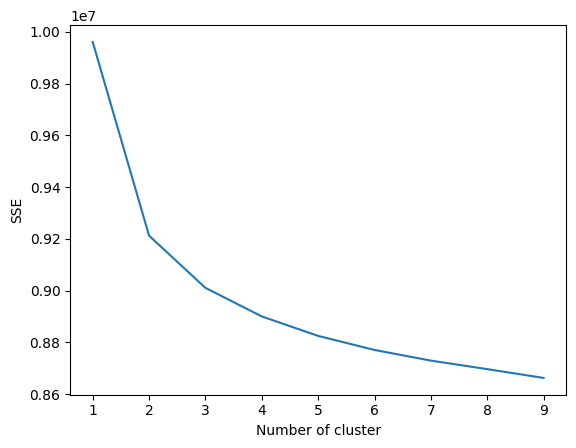

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

elbow_method = {}
for k in range(1, 10):
    kmeans_elbow = KMeans(n_clusters=k,n_init = 2).fit(cv_tedfeatures)
    elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


# Implementing silhouette to find optimal clusters

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster,n_init = 2).fit(cv_tedfeatures)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cv_tedfeatures, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.14132220024653336


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.05391484946749521


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.00030831442027837044


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.0027673716606677543


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is -0.010082212816458458


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.0056049043208481085


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is -0.0021742242167005228


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is -0.007543368402668536


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is -0.011531199293629758


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11, The Silhouette Coefficient is -0.02083557843847174


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=12, The Silhouette Coefficient is -0.022270177912596965


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=13, The Silhouette Coefficient is -0.019137224442504392


C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=14, The Silhouette Coefficient is -0.014208039099481864


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


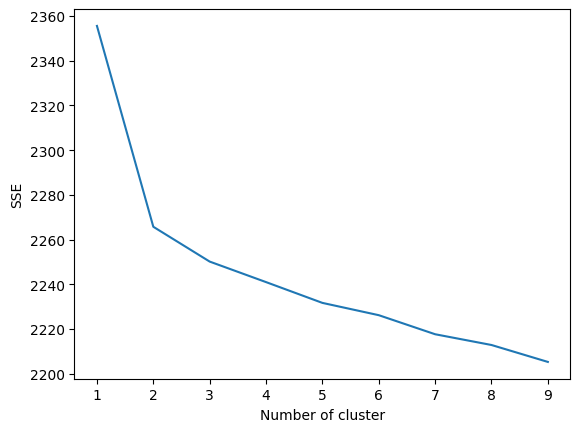

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

elbow_method = {}
for k in range(1, 10):
    kmeans_elbow = KMeans(n_clusters=k,n_init=10).fit(tv_tedfeatures)
    elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster,n_init = 5).fit(tv_tedfeatures)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cv_tedfeatures, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is -0.19411316433868556
For n_clusters=3, The Silhouette Coefficient is -0.1809933010760296
For n_clusters=4, The Silhouette Coefficient is -0.18113367801817037
For n_clusters=5, The Silhouette Coefficient is -0.1800691703542984
For n_clusters=6, The Silhouette Coefficient is -0.1786033049058823
For n_clusters=7, The Silhouette Coefficient is -0.177024113724864
For n_clusters=8, The Silhouette Coefficient is -0.17377946594777455
For n_clusters=9, The Silhouette Coefficient is -0.17237428777044467
For n_clusters=10, The Silhouette Coefficient is -0.1718550711868233
For n_clusters=11, The Silhouette Coefficient is -0.17198184841846248
For n_clusters=12, The Silhouette Coefficient is -0.1712245524536562
For n_clusters=13, The Silhouette Coefficient is -0.17135204932002637
For n_clusters=14, The Silhouette Coefficient is -0.16987511987706413


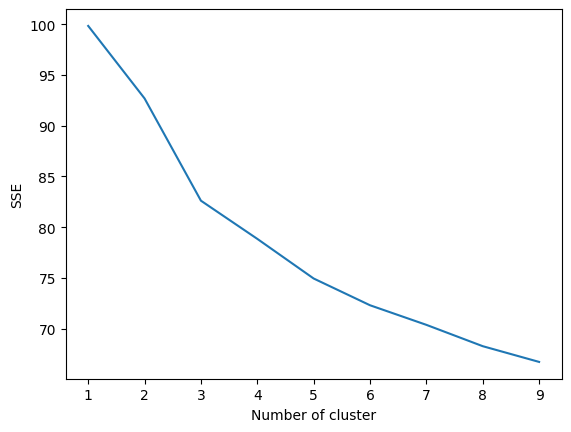

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

elbow_method = {}
for k in range(1, 10):
    kmeans_elbow = KMeans(n_clusters=k,n_init=10).fit(results_value)
    elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster,n_init = 5).fit(results_value)
    label = kmeans.labels_
    sil_coeff = silhouette_score(results_value, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.918796332819177
For n_clusters=3, The Silhouette Coefficient is 0.08361313080329551
For n_clusters=4, The Silhouette Coefficient is 0.06500569453630557
For n_clusters=5, The Silhouette Coefficient is 0.06875116563158279
For n_clusters=6, The Silhouette Coefficient is 0.07061003829032078
For n_clusters=7, The Silhouette Coefficient is 0.06074230990987908
For n_clusters=8, The Silhouette Coefficient is 0.048920565428791245
For n_clusters=9, The Silhouette Coefficient is 0.0505809088234814
For n_clusters=10, The Silhouette Coefficient is 0.04778220209230427
For n_clusters=11, The Silhouette Coefficient is 0.03745819807432463
For n_clusters=12, The Silhouette Coefficient is 0.03884128836234091
For n_clusters=13, The Silhouette Coefficient is 0.040691494049472046
For n_clusters=14, The Silhouette Coefficient is 0.039397929198958424


In [56]:
print(cv_tedfeatures.shape)
print(tv_tedfeatures.shape)
resultt= np.array(results_value)
results_value

(2550, 57587)
(2550, 57587)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2465,) + inhomogeneous part.

# Clustering 

In [33]:
segments = KMeans(n_clusters=2)
segments.fit(results_value)
#segment outputsfinal clusters
output = segments.labels_.tolist()

ted_segmentaion =  {'transcript': results_key, 'cluster': output}
output_df = pd.DataFrame(ted_segmentaion)
#talks per segment 
output_df['cluster'] = segments.labels_.tolist()

output_df['cluster'].value_counts()

C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    1260
1    1205
Name: count, dtype: int64

In [34]:
cluster_1 = output_df[output_df.cluster == 1]
cluster_0 = output_df[output_df.cluster == 0]


# Word cloud for cluster 1

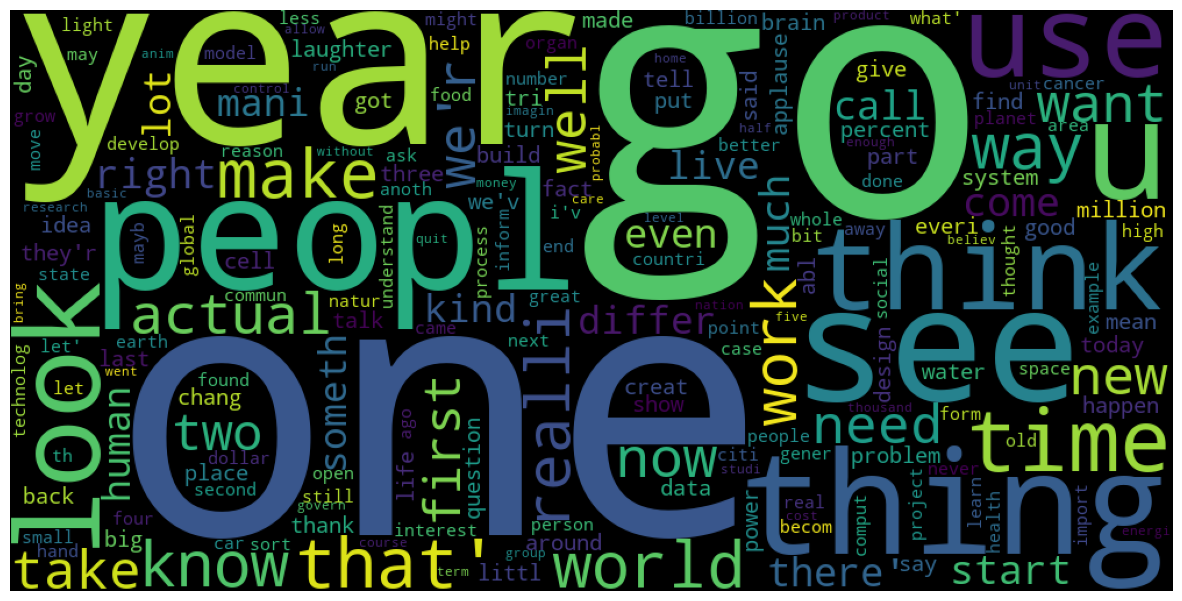

In [35]:
# cluster 1 visualization

from wordcloud import WordCloud, STOPWORDS

# Mono Gram

wordcloud = WordCloud(width = 1000, height = 500,collocations = False).generate_from_text(' '.join(cluster_1['transcript']))
# Generate plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Word cloud for cluster 2

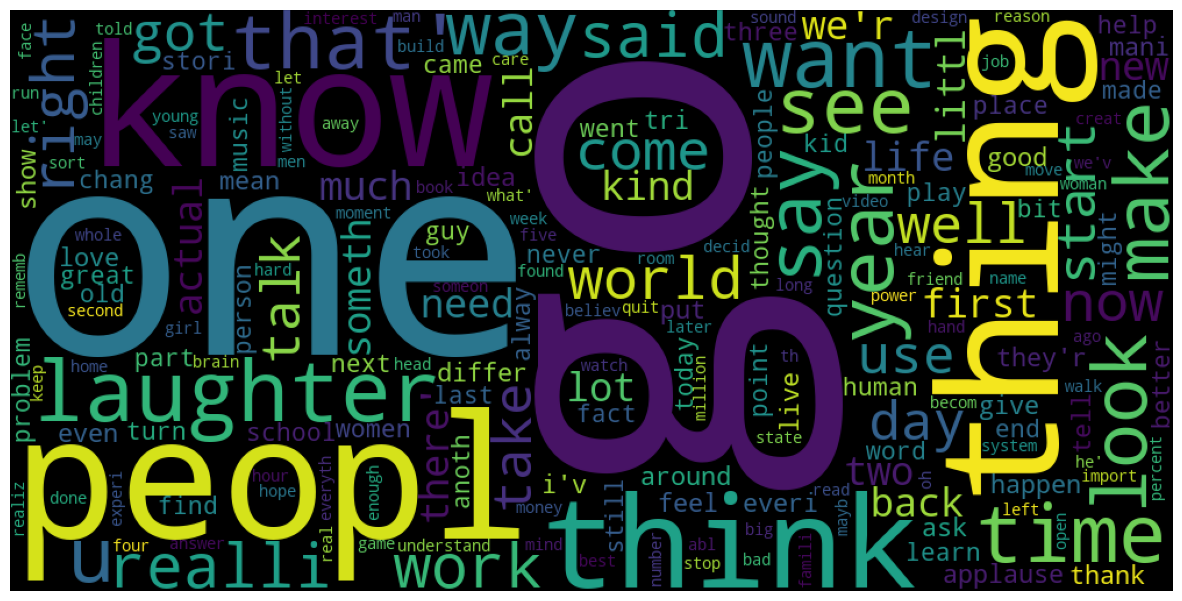

In [36]:
# similarlySimilarly for segment 0 visualization
wordcloud = WordCloud(width = 1000, height = 500,collocations = False).generate_from_text(' '.join(cluster_0['transcript']))
 
# Generate plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
def process(doc):
    toks = [w for s in nltk.sent_tokenize(doc) for w in nltk.word_tokenize(s)]
    filt_toks = []
    for i in toks:
        if re.search('[a-zA-Z]', i):
            filt_toks.append(i)
    post_process = [st.stem(t) for t in filt_toks]
    return post_process

# Topic Modeling

In [21]:
#import
from gensim import corpora, models, similarities 


toks = [process(a) for a in cluster_1.transcript]

talks = [[x for x in y if  x not in sw] for y in toks]


#dictionary from text
dictionary = corpora.Dictionary(talks)

#remove 
#dictionary.filter_extremes(no_below=1, no_above=0.8)
#
#dict to bowbag of words
doc = [dictionary.doc2bow(text) for text in talks]

#topic modeling
tm = models.LdaModel(doc, num_topics=5)

tm.show_topics()

[(0,
  '0.010*"306" + 0.009*"383" + 0.009*"404" + 0.009*"227" + 0.007*"315" + 0.006*"570" + 0.006*"564" + 0.006*"220" + 0.006*"488" + 0.005*"451"'),
 (1,
  '0.010*"404" + 0.007*"594" + 0.006*"306" + 0.006*"383" + 0.006*"220" + 0.006*"639" + 0.005*"227" + 0.005*"633" + 0.005*"321" + 0.005*"564"'),
 (2,
  '0.009*"227" + 0.008*"383" + 0.008*"306" + 0.007*"404" + 0.007*"443" + 0.006*"594" + 0.006*"628" + 0.006*"633" + 0.005*"293" + 0.005*"321"'),
 (3,
  '0.008*"306" + 0.008*"227" + 0.008*"564" + 0.007*"404" + 0.007*"383" + 0.007*"562" + 0.007*"293" + 0.006*"639" + 0.006*"629" + 0.006*"443"'),
 (4,
  '0.009*"404" + 0.009*"306" + 0.008*"383" + 0.006*"562" + 0.006*"633" + 0.006*"443" + 0.005*"639" + 0.005*"220" + 0.005*"609" + 0.005*"488"')]

In [22]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(tm, doc, dictionary)################33doc1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.009623 -0.001951       1        1  31.826013
2     -0.005502  0.010765       2        1  22.245640
3     -0.004838 -0.001016       3        1  20.171178
4      0.002266 -0.011245       4        1  15.876988
1      0.017697  0.003448       5        1   9.880181, topic_info=      Term          Freq         Total Category  logprob  loglift
404  peopl  19400.000000  19400.000000  Default  30.0000  30.0000
639   year  11401.000000  11401.000000  Default  29.0000  29.0000
594     us  12610.000000  12610.000000  Default  28.0000  28.0000
633  would  11571.000000  11571.000000  Default  27.0000  27.0000
74   brain   2923.000000   2923.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
293   know    837.253880  12464.325828   Topic5  -5.6455  -0.3859
469  right    707.000477   8123.766365   Topic5  -5.8146  -0.1269
562  thing    790.931580  12920.638932   Topic5  -5.7024  -0.4787
609   want    751.624720  10616.117506   Topic5  -5.7534  -0.3333
629  world    715.971999  10179.106142   Topic5  -5.8020  -0.3398

[468 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
3          1  0.371541      'm
3          2  0.227848      'm
3          3  0.186717      'm
3          4  0.143483      'm
3          5  0.070479      'm
...      ...       ...     ...
35332      1  0.725010  zodiac
35332      2  0.017262  zodiac
35332      3  0.138097  zodiac
35332      4  0.051786  zodiac
35332      5  0.069049  zodiac

[1348 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

In [23]:
# dictionary 
dictionary1 = corpora.Dictionary(talks)

#remove 
#dictionary1.filter_extremes(no_below=1, no_above=0.8)

# bowdictionary to bag of words 
doc1 = [dictionary1.doc2bow(text) for text in talks]

tm2 = models.LdaModel(doc1, num_topics=6)
tm2.show_topics()################tm2

[(0,
  '0.008*"306" + 0.007*"383" + 0.007*"227" + 0.006*"220" + 0.006*"443" + 0.006*"404" + 0.005*"321" + 0.005*"594" + 0.005*"611" + 0.005*"293"'),
 (1,
  '0.009*"564" + 0.007*"383" + 0.007*"220" + 0.007*"227" + 0.006*"306" + 0.006*"293" + 0.006*"451" + 0.006*"570" + 0.005*"321" + 0.005*"609"'),
 (2,
  '0.009*"306" + 0.008*"227" + 0.008*"383" + 0.007*"404" + 0.007*"594" + 0.005*"443" + 0.005*"633" + 0.005*"570" + 0.005*"629" + 0.005*"639"'),
 (3,
  '0.011*"404" + 0.010*"306" + 0.009*"383" + 0.008*"293" + 0.007*"227" + 0.006*"3" + 0.006*"570" + 0.006*"562" + 0.006*"321" + 0.005*"220"'),
 (4,
  '0.009*"298" + 0.009*"404" + 0.009*"306" + 0.008*"227" + 0.008*"383" + 0.006*"562" + 0.006*"564" + 0.005*"609" + 0.005*"633" + 0.005*"315"'),
 (5,
  '0.009*"404" + 0.008*"383" + 0.008*"227" + 0.008*"306" + 0.006*"628" + 0.006*"564" + 0.006*"443" + 0.006*"570" + 0.006*"488" + 0.006*"562"')]

In [24]:
pyLDAvis.gensim.prepare(tm2, doc1, dictionary1)############doc1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.000380  0.012371       1        1  29.392243
3     -0.010550 -0.000099       2        1  23.717479
2      0.003580  0.007193       3        1  16.205240
4     -0.009106 -0.004971       4        1  14.810818
0      0.013696 -0.004084       5        1   8.993401
1      0.002000 -0.010410       6        1   6.880819, topic_info=         Term          Freq         Total Category  logprob  loglift
564     think  13276.000000  13276.000000  Default  30.0000  30.0000
220       get  12732.000000  12732.000000  Default  29.0000  29.0000
298  laughter  10508.000000  10508.000000  Default  28.0000  28.0000
3          'm   9562.000000   9562.000000  Default  27.0000  27.0000
227        go  18056.000000  18056.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
469     right    555.807037   8181.951888   Topic6  -5.6934  -0.0128
404     peopl    791.339055  20050.418178   Topic6  -5.3401  -0.5558
628      work    576.768465  10780.185050   Topic6  -5.6564  -0.2516
596         v    534.791128   8446.055524   Topic6  -5.7319  -0.0831
611       way    542.971075  10312.740711   Topic6  -5.7168  -0.2676

[544 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.218588    'd
1         2  0.312609    'd
1         3  0.095038    'd
1         4  0.223001    'd
1         5  0.082819    'd
...     ...       ...   ...
1957      2  0.268274  zone
1957      3  0.347034  zone
1957      4  0.105833  zone
1957      5  0.044302  zone
1957      6  0.081221  zone

[1652 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 5, 1, 2])